In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import json

sns.set_style("whitegrid", {"grid.color": ".93"})

In [4]:
paths = json.load(open("../../paths.json"))

path_data= Path(paths["path_data"])
path_data_nexuse_results = Path(paths["path_data_nexuse_results"])

path_figs = Path(paths["path_figs"])
path_figs_nexuse = path_figs / "nexus-e"

In [5]:
date_range_2050_hourly = pd.date_range("2050-01-01", "2051-01-01", freq="1H", inclusive="left")

In [6]:
cm = 1/2.54

In [7]:
paths_simulations_import_limit = sorted(list((path_data_nexuse_results / "limit_import_monthly_bias_correction").glob("*")))
simulation_import_limit_names = ([int(path.stem.split("_")[-1]) for path in paths_simulations_import_limit])

paths_simulations_no_import_limit = sorted(list((path_data_nexuse_results / "no_limit_import_monthly_bias_correction").glob("*")))
simulation_no_import_limit_names = ([int(path.stem.split("_")[-1]) for path in paths_simulations_no_import_limit])

## Load data

### Total capacity in 2050

In [8]:
dfs_cap_import_limit = [pd.read_csv(path / "resultPostProcess" / "Cap_CH_centiv_distiv.csv", index_col=0)[["2050"]] 
                        for path in paths_simulations_import_limit]

dfs_cap_no_import_limit = [pd.read_csv(path / "resultPostProcess" / "Cap_CH_centiv_distiv.csv", index_col=0)[["2050"]] 
                           for path in paths_simulations_no_import_limit]

In [9]:
df_cap_import_limit = pd.concat(dfs_cap_import_limit, axis=1)
df_cap_import_limit.columns = simulation_import_limit_names
df_cap_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Dam,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,...,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0
GasCC,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
GasSC,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Oil,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
PV-alpine,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,...,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0


In [10]:
df_cap_no_import_limit = pd.concat(dfs_cap_no_import_limit, axis=1)
df_cap_no_import_limit.columns = simulation_no_import_limit_names
df_cap_no_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Dam,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,...,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0
GasCC,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
GasSC,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0
Oil,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
PV-alpine,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,...,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0,1213.0


### Total generation in 2050

In [11]:
dfs_gens_import_limit = []
for path in paths_simulations_import_limit:
    df_gens_import_limit = pd.read_csv(path / "resultPostProcess" / "Gen_CH_2050_c.csv", index_col=0) 
    df_gens_import_limit.index = date_range_2050_hourly
    dfs_gens_import_limit.append(df_gens_import_limit)

dfs_gens_no_import_limit = []
for path in paths_simulations_no_import_limit:
    df_gens_no_import_limit = pd.read_csv(path / "resultPostProcess" / "Gen_CH_2050_c.csv", index_col=0) 
    df_gens_no_import_limit.index = date_range_2050_hourly
    dfs_gens_no_import_limit.append(df_gens_no_import_limit)

In [12]:
df_gen_import_limit = pd.concat(dfs_gens_import_limit, axis=1, keys=simulation_import_limit_names)
df_gen_no_import_limit = pd.concat(dfs_gens_no_import_limit, axis=1, keys=simulation_no_import_limit_names)

In [13]:
df_gen_import_limit.head()

1991                                                \
                            Dam          RoR Nuclear Nuclear-FastRamp Lignite   
2050-01-01 00:00:00  198.413149  1531.737029     0.0              0.0     0.0   
2050-01-01 01:00:00    1.760850  1531.735942     0.0              0.0     0.0   
2050-01-01 02:00:00   38.664602  1531.735934     0.0              0.0     0.0   
2050-01-01 03:00:00    0.203708  1531.734894     0.0              0.0     0.0   
2050-01-01 04:00:00    0.113444  1531.734625     0.0              0.0     0.0   

                                                          ...            2022  \
                    Coal Coal-IGCC GasCC GasCC-CCS GasSC  ... EMob Shift (Up)   
2050-01-01 00:00:00  0.0       0.0   0.0       0.0   0.0  ...       -0.155200   
2050-01-01 01:00:00  0.0       0.0   0.0       0.0   0.0  ...       -0.186662   
2050-01-01 02:00:00  0.0       0.0   0.0       0.0   0.0  ...       -0.192796   
2050-01-01 03:00:00  0.0       0.0   0.0       0.0   0.0  ...     -335.606366   
2050-01-01 04:00:00  0.0       0.0   0.0       0.0   0.0  ...     -899.329541   

                                                                           \
                    Load_Shed Load_Shed-Ind DAC (Load) Methanation (Load)   
2050-01-01 00:00:00  0.000145           0.0        0.0               -0.0   
2050-01-01 01:00:00  0.000145           0.0        0.0               -0.0   
2050-01-01 02:00:00  0.000145           0.0        0.0               -0.0   
2050-01-01 03:00:00  0.000144           0.0        0.0               -0.0   
2050-01-01 04:00:00  0.000144           0.0        0.0               -0.0   

                                                                     \
                    Load (Total) PV-Total   Wind-Total      Imports   
2050-01-01 00:00:00       8836.0      0.0  1851.380823  6650.365222   
2050-01-01 01:00:00       8196.0      0.0  1867.390650  7223.315011   
2050-01-01 02:00:00       7862.0      0.0  2125.577269  7026.837844   
2050-01-01 03:00:00       7606.0      0.0  2747.755941  7396.788894   
2050-01-01 04:00:00       7529.0      0.0  1729.042177  8302.936435   

                                  
                         Exports  
2050-01-01 00:00:00 -4114.988879  
2050-01-01 01:00:00 -3147.062205  
2050-01-01 02:00:00 -3413.922836  
2050-01-01 03:00:00 -2960.623503  
2050-01-01 04:00:00 -1737.088573  

[5 rows x 1984 columns]

In [14]:
df_annual_ror_gen_limit_import = df_gen_import_limit.loc[:, (slice(None), "RoR")].sum().droplevel(1)
df_annual_imports_limit_import = df_gen_import_limit.loc[:, (slice(None), "Imports")].sum().droplevel(1)
df_annual_exports_limit_import = df_gen_import_limit.loc[:, (slice(None), "Exports")].sum().droplevel(1)

In [15]:
df_annual_ror_gen_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "RoR")].sum().droplevel(1)
df_annual_imports_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "Imports")].sum().droplevel(1)
df_annual_exports_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "Exports")].sum().droplevel(1)

In [16]:
winter_months = [1, 2, 3, 10, 11, 12]

df_monthly_imports_limit_import = df_gen_import_limit.loc[:, (slice(None), "Imports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)
df_monthly_exports_limit_import = df_gen_import_limit.loc[:, (slice(None), "Exports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)

df_winter_imports_limit_import = df_monthly_imports_limit_import[df_monthly_imports_limit_import.index.month.isin(winter_months)].sum(axis=0)
df_winter_exports_limit_import = df_monthly_exports_limit_import[df_monthly_exports_limit_import.index.month.isin(winter_months)].sum(axis=0)

In [17]:
df_monthly_imports_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "Imports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)
df_monthly_exports_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "Exports")].groupby(pd.Grouper(freq='M')).sum().droplevel(1, axis=1)

df_winter_imports_no_limit_import = df_monthly_imports_no_limit_import[df_monthly_imports_no_limit_import.index.month.isin(winter_months)].sum(axis=0)
df_winter_exports_no_limit_import = df_monthly_exports_no_limit_import[df_monthly_exports_no_limit_import.index.month.isin(winter_months)].sum(axis=0)

In [18]:
df_pumped_storage_limit_import = df_gen_import_limit.loc[:, (slice(None), df_gen_import_limit.columns.get_level_values(1).str.startswith("Pump-Open"))].groupby(pd.Grouper(freq='M')).sum() * 1e-3
df_pumped_storage_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), df_gen_no_import_limit.columns.get_level_values(1).str.startswith("Pump-Open"))].groupby(pd.Grouper(freq='M')).sum() * 1e-3

In [19]:
df_annual_wind_limit_import = df_gen_import_limit.loc[:, (slice(None), "Wind-Total")].sum().droplevel(1)
df_annual_wind_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), "Wind-Total")].sum().droplevel(1)

In [20]:
df_annual_net_generation_limit_import = df_gen_import_limit.groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()
df_annual_net_generation_no_limit_import = df_gen_no_import_limit.groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()

In [21]:
df_annual_domestic_generation_limit_import = df_gen_import_limit.loc[:, (slice(None), slice("Dam", "Pump-Closed"))].groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()
df_annual_domestic_generation_no_limit_import = df_gen_no_import_limit.loc[:, (slice(None), slice("Dam", "Pump-Closed"))].groupby(pd.Grouper(freq='Y')).sum().groupby(level=0, axis=1).sum().sum()

### Electricity prices

#### Annual

In [22]:
dfs_elec_price_limit_import = []

for path in paths_simulations_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_annual_c.csv"))[0]
    df_elec_price_limit_import = pd.read_csv(path_file, index_col=0) 
    dfs_elec_price_limit_import.append(df_elec_price_limit_import)

dfs_elec_price_no_limit_import = []

for path in paths_simulations_no_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_annual_c.csv"))[0]
    df_elec_price_no_limit_import = pd.read_csv(path_file, index_col=0) 
    dfs_elec_price_no_limit_import.append(df_elec_price_no_limit_import)

In [23]:
df_elec_price_limit_import = pd.concat(dfs_elec_price_limit_import, axis=1)
df_elec_price_limit_import.columns = simulation_import_limit_names
df_elec_price_limit_import.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Row,,,,,,,,,,,,,,,,,,,,,
Switzerland,71.959454,71.615929,71.423128,71.840092,71.667775,73.415256,71.832701,71.849845,71.697406,71.413613,...,71.457091,71.407464,73.462901,72.219338,75.252264,72.172997,71.248389,71.798754,73.824889,72.274457
Germany,84.241394,84.075677,84.473234,84.113891,83.670723,85.688307,83.868506,84.544094,83.834610,84.344073,...,84.350235,84.161948,85.388507,84.111356,86.007761,85.086592,84.071933,84.181654,85.410056,85.266376
Italy,64.200351,63.968257,63.821173,64.170361,64.064244,64.777349,64.177528,64.049291,63.914996,63.992711,...,63.951398,63.814621,64.693213,64.382780,65.583282,64.079755,64.090390,64.021702,64.815263,64.259845
France,37.629446,37.637603,37.920112,37.674683,37.646172,38.902931,37.689165,37.798665,37.655179,37.619777,...,37.763626,37.700756,38.642739,38.009199,39.360926,37.966358,37.519317,37.608307,38.886102,38.112436
Austria,72.563841,72.357997,72.254588,72.658935,71.962398,72.669748,72.043711,72.576382,72.311157,72.333082,...,72.139903,72.169776,73.064374,72.368277,73.645667,72.577147,72.224080,72.299561,73.244330,72.443726


In [24]:
df_elec_price_no_limit_import = pd.concat(dfs_elec_price_no_limit_import, axis=1)
df_elec_price_no_limit_import.columns = simulation_no_import_limit_names
df_elec_price_no_limit_import.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Row,,,,,,,,,,,,,,,,,,,,,
Switzerland,56.727042,56.189423,56.977867,55.845480,55.820100,57.453813,56.254939,56.499171,55.603242,55.545801,...,56.481003,56.170998,56.384160,56.254797,56.793413,56.454395,56.046762,56.245429,56.224312,57.584331
Germany,76.782034,76.528152,78.255176,76.044119,76.359339,78.589745,76.447848,76.880988,75.947093,76.280085,...,77.285258,76.860178,76.847225,76.580536,76.953910,77.162699,76.513365,76.433882,76.707800,78.592477
Italy,55.892302,55.539790,55.417905,55.461234,55.328856,55.780076,55.636207,55.685439,55.240640,55.482384,...,55.507293,55.447562,55.655441,55.594562,55.859633,55.700603,55.567202,55.715535,55.552389,55.940226
France,29.936753,29.892544,31.478194,29.524904,29.864344,31.637972,29.750554,30.109024,29.413845,29.749780,...,30.519664,30.259457,29.983393,29.883803,30.050876,30.397987,29.832318,29.767552,30.023718,31.505501
Austria,66.988634,66.666199,66.066540,66.769124,66.214498,66.442745,66.294077,66.802044,66.225396,66.260729,...,66.214611,66.197752,66.571413,66.302192,66.039547,66.737357,66.422205,66.560020,66.197373,66.790431


#### Monthly

In [25]:
dfs_elec_price_monthly_import_limit = []

for path in paths_simulations_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_import_limit = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_monthly_import_limit.append(df_elec_price_monthly_import_limit)

dfs_elec_price_monthly_no_import_limit = []

for path in paths_simulations_no_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_no_import_limit = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_monthly_no_import_limit.append(df_elec_price_monthly_no_import_limit)

In [26]:
df_elec_price_monthly_import_limit = pd.concat(dfs_elec_price_monthly_import_limit, axis=1)
df_elec_price_monthly_import_limit.columns = simulation_import_limit_names
df_elec_price_monthly_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
1,104.013455,104.613037,104.025050,103.567249,104.330042,106.731353,105.484322,104.202489,106.302698,104.411656,...,104.090049,103.635059,107.500306,107.202344,111.854732,102.142663,104.070468,103.679946,108.679211,102.551398
2,128.000719,126.552960,126.611544,127.815462,125.816536,130.353507,128.234469,126.731680,129.229180,126.262431,...,126.724715,126.174777,131.213025,128.144075,135.108426,125.552200,126.377823,125.266281,130.546912,125.847483
3,118.492628,119.353507,123.236696,120.614226,120.791790,126.412610,119.455131,120.802182,119.920367,120.232384,...,122.031735,121.043684,123.115697,121.723134,124.396295,120.588970,120.292806,118.330056,124.388266,122.306302
4,29.750613,30.164624,29.539588,29.602983,27.406772,30.031584,30.789426,28.430127,26.201209,29.724058,...,29.326853,30.212690,23.650657,24.469326,26.437371,25.157479,30.449631,30.016966,28.042655,29.834245
5,10.949277,8.610382,9.156676,8.387950,8.560583,8.938626,9.445753,9.475180,8.293370,8.405834,...,8.462110,9.610480,8.445452,9.004384,9.641007,8.394128,10.367309,9.085623,8.696310,9.489795


In [27]:
df_elec_price_monthly_no_import_limit = pd.concat(dfs_elec_price_monthly_no_import_limit, axis=1)
df_elec_price_monthly_no_import_limit.columns = simulation_no_import_limit_names
df_elec_price_monthly_no_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
1,72.734173,73.337582,72.113992,70.916963,71.917606,73.329025,72.764448,72.676869,72.415657,73.058283,...,72.886959,72.376524,71.910360,72.855022,74.916179,70.403420,72.563800,72.523023,73.045394,72.353891
2,93.958657,93.573696,93.000795,93.116967,90.628407,94.003993,93.029150,92.976812,93.664198,91.610498,...,92.810291,92.244011,93.530966,91.840356,94.361869,91.839425,92.679237,91.917403,91.594725,92.237874
3,95.159361,97.264028,109.481223,95.401435,97.404115,110.096326,94.208113,97.972097,94.305787,97.821357,...,102.352463,100.258383,96.649838,95.964258,94.381693,101.479808,96.307894,94.742923,96.181902,106.895922
4,36.727371,35.700635,35.255391,35.344158,34.559392,35.972633,36.902994,35.867368,34.998390,35.006136,...,35.337374,35.788019,34.674645,34.635729,36.133629,33.584650,35.942939,35.649567,35.938132,36.232506
5,14.388348,9.959123,10.760116,9.759224,9.948644,10.512156,11.671936,11.632758,9.655591,9.509691,...,9.570482,11.351425,9.856907,10.978182,12.022502,9.641916,12.193502,10.699282,10.689521,11.342215


In [28]:
dfs_elec_price_monthly_import_limit_all = []

for path in paths_simulations_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_import_limit_all = pd.read_csv(path_file, index_col=0)
    dfs_elec_price_monthly_import_limit_all.append(df_elec_price_monthly_import_limit_all)

df_elec_price_monthly_import_limit_all = (pd.concat(dfs_elec_price_monthly_import_limit_all, 
                                                   axis=1, keys=simulation_import_limit_names)
                                          .swaplevel(0, 1, axis=1)
                                          .sort_index(axis=1, level=0))

dfs_elec_price_monthly_no_import_limit_all = []

for path in paths_simulations_no_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_monthly_c_2050.csv"))[0]
    df_elec_price_monthly_no_import_limit_all = pd.read_csv(path_file, index_col=0)
    dfs_elec_price_monthly_no_import_limit_all.append(df_elec_price_monthly_no_import_limit_all)

df_elec_price_monthly_no_import_limit_all = (pd.concat(dfs_elec_price_monthly_no_import_limit_all, 
                                                      axis=1, keys=simulation_no_import_limit_names)
                                             .swaplevel(0, 1, axis=1)
                                             .sort_index(axis=1, level=0))

#### Seasonal

In [29]:
df_elec_price_summer_winter_no_import_limit = df_elec_price_monthly_no_import_limit.copy()
df_elec_price_summer_winter_no_import_limit.index = ["Winter" if i < 4 or i > 9 else "Summer" for i in range(1, 13)]
df_elec_price_summer_winter_no_import_limit = df_elec_price_summer_winter_no_import_limit.groupby(df_elec_price_summer_winter_no_import_limit.index).agg("mean")

df_elec_price_summer_winter_import_limit = df_elec_price_monthly_import_limit.copy()
df_elec_price_summer_winter_import_limit.index = ["Winter" if i < 4 or i > 9 else "Summer" for i in range(1, 13)]
df_elec_price_summer_winter_import_limit = df_elec_price_summer_winter_import_limit.groupby(df_elec_price_summer_winter_import_limit.index).agg("mean")

In [30]:
seasons = {"DJF": [12, 1, 2], "MAM": [3, 4, 5], "JJA": [6, 7, 8], "SON": [9, 10, 11]}
seasons = {i: season for season in seasons for i in seasons[season]}

df_elec_price_seasonal_no_import_limit = df_elec_price_monthly_no_import_limit.copy()
df_elec_price_seasonal_no_import_limit.index = [seasons[i] for i in range(1, 13)]
df_elec_price_seasonal_no_import_limit = df_elec_price_seasonal_no_import_limit.groupby(df_elec_price_seasonal_no_import_limit.index).agg("mean")
df_elec_price_seasonal_no_import_limit = df_elec_price_seasonal_no_import_limit.loc[["DJF", "MAM", "JJA", "SON"]]


df_elec_price_seasonal_import_limit = df_elec_price_monthly_import_limit.copy()
df_elec_price_seasonal_import_limit.index = [seasons[i] for i in range(1, 13)]
df_elec_price_seasonal_import_limit = df_elec_price_seasonal_import_limit.groupby(df_elec_price_seasonal_import_limit.index).agg("mean")
df_elec_price_seasonal_import_limit = df_elec_price_seasonal_import_limit.loc[["DJF", "MAM", "JJA", "SON"]]

In [31]:
df_elec_price_seasonal_import_limit

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
DJF,113.942331,113.088586,113.150536,113.958672,113.979142,116.027934,114.759340,113.464935,115.553476,113.213267,...,113.293919,112.775252,117.293238,116.036451,121.165420,112.074571,112.974375,112.795984,117.897052,112.483931
MAM,53.064173,52.709505,53.977653,52.868387,52.253048,55.127607,53.230103,52.902496,51.471649,52.787425,...,53.273566,53.622285,51.737269,51.732281,53.491558,51.380192,53.703249,52.477549,53.709077,53.876781
JJA,36.421840,36.452603,36.888520,36.124049,35.458401,38.227357,35.433886,37.438722,34.994134,37.338975,...,36.879308,36.823722,37.598794,35.478853,38.042126,39.595515,36.593428,37.824257,35.920948,38.928683
SON,85.462341,85.220218,82.697589,85.439872,85.941630,85.332328,84.956397,84.586222,85.826331,83.344168,...,83.417238,83.420433,88.235400,86.606604,89.376438,86.566192,82.749828,85.061147,88.785549,84.779968


### Imports/Exports prices

In [32]:
dfs_elec_price_hourly_import_limit = []

for path in paths_simulations_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_hourly_c_2050.csv"))[0]
    df_elec_price_hourly_import_limit = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_hourly_import_limit.append(df_elec_price_hourly_import_limit)

dfs_elec_price_hourly_no_import_limit = []

for path in paths_simulations_no_import_limit:
    path_file = list((path / "resultPostProcess").glob("**/national_elecprice_hourly_c_2050.csv"))[0]
    df_elec_price_hourly_no_import_limit = pd.read_csv(path_file, index_col=0)["Switzerland"] 
    dfs_elec_price_hourly_no_import_limit.append(df_elec_price_hourly_no_import_limit)

In [33]:
df_elec_price_hourly_import_limit = pd.concat(dfs_elec_price_hourly_import_limit, axis=1)
df_elec_price_hourly_import_limit.columns = simulation_import_limit_names
df_elec_price_hourly_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Hour,,,,,,,,,,,,,,,,,,,,,
0,106.026464,105.279391,105.423945,106.613420,107.014702,108.167996,106.984205,105.714833,107.673528,105.393517,...,105.581816,104.962462,109.352020,108.781647,112.676828,104.443480,105.219744,105.156391,110.217935,95.632333
1,96.606939,102.472546,97.307865,95.908899,96.245654,98.748552,97.564787,97.012655,99.361016,96.488850,...,96.162326,96.987368,99.943519,103.243052,105.316447,95.783502,96.462057,95.736910,100.798470,94.033308
2,96.632352,102.497778,97.332811,95.934305,96.271048,98.773954,97.590174,97.017884,99.386360,96.494501,...,96.187739,97.012658,99.957982,103.259860,105.321289,95.808909,96.487251,95.762323,100.823871,94.027414
3,89.510178,95.715359,95.847590,88.811940,89.148439,96.364385,95.259019,95.861095,95.955900,95.608812,...,92.988584,95.396679,96.607650,96.337040,98.199033,91.479182,95.572597,93.810591,97.558547,86.902704
4,87.865634,92.777018,88.716665,87.869552,88.286487,90.464198,89.244531,88.543384,90.810601,88.061701,...,87.866164,88.366844,91.648370,94.115730,96.568026,87.463442,88.004288,87.415987,92.478315,85.960433


In [34]:
df_elec_price_hourly_no_import_limit = pd.concat(dfs_elec_price_hourly_no_import_limit, axis=1)
df_elec_price_hourly_no_import_limit.columns = simulation_no_import_limit_names
df_elec_price_hourly_no_import_limit.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Hour,,,,,,,,,,,,,,,,,,,,,
0,69.813798,69.100337,69.593543,69.923286,69.791872,70.031345,68.742651,69.477757,68.201614,69.452540,...,69.841432,69.519460,68.862839,68.991714,67.600982,69.904631,68.954944,69.084673,69.073599,69.882486
1,69.836907,69.103179,69.549254,69.947617,69.816089,69.993956,68.761347,69.464905,68.225860,69.474003,...,69.854058,69.527725,68.886675,68.995819,67.598508,69.928881,68.973435,69.108292,69.097886,69.906923
2,69.861785,69.122737,69.532187,69.972009,69.838950,69.926976,68.779655,69.483404,68.244810,69.498899,...,69.886381,69.549128,68.906650,69.011540,67.609345,69.947340,68.991779,69.126689,69.121248,69.931055
3,66.611946,69.115769,69.553966,65.627820,67.402417,69.943070,67.479222,69.492968,66.647416,69.073398,...,69.842552,69.537888,68.864800,69.015264,67.626449,67.481483,68.214774,67.761943,68.925724,66.670293
4,66.765988,68.930675,69.386625,65.377807,67.139241,69.776573,67.067254,69.287703,66.354999,68.876717,...,69.162178,69.289256,68.563991,68.662660,67.304046,67.351204,68.083833,67.542732,68.633062,62.292453


In [35]:
df_ratio_imports_elecprice_import_limit = (df_gen_import_limit.loc[:, (slice(None), "Imports")].droplevel(1, axis=1) / df_elec_price_hourly_import_limit.set_index(df_gen_import_limit.index)).replace([np.inf, -np.inf], np.nan)
df_ratio_exports_elecprice_import_limit = ((-df_gen_import_limit.loc[:, (slice(None), "Exports")]).droplevel(1, axis=1) / df_elec_price_hourly_import_limit.set_index(df_gen_import_limit.index)).replace([np.inf, -np.inf], np.nan)

df_monthly_mean_ratio_imports_elecprice_import_limit = df_ratio_imports_elecprice_import_limit.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())
df_monthly_mean_ratio_exports_elecprice_import_limit = df_ratio_exports_elecprice_import_limit.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())

In [36]:
df_ratio_imports_elecprice_no_import_limit = (df_gen_no_import_limit.loc[:, (slice(None), "Imports")].droplevel(1, axis=1) / df_elec_price_hourly_no_import_limit.set_index(df_gen_import_limit.index)).replace([np.inf, -np.inf], np.nan)
df_ratio_exports_elecprice_no_import_limit = ((-df_gen_no_import_limit.loc[:, (slice(None), "Exports")]).droplevel(1, axis=1) / df_elec_price_hourly_no_import_limit.set_index(df_gen_import_limit.index)).replace([np.inf, -np.inf], np.nan)

df_monthly_mean_ratio_imports_elecprice_no_import_limit = df_ratio_imports_elecprice_no_import_limit.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())
df_monthly_mean_ratio_exports_elecprice_no_import_limit = df_ratio_exports_elecprice_no_import_limit.groupby(pd.Grouper(freq='M')).agg(lambda x: x.dropna().mean())

## Paper plots

In [37]:
fontsize_ticks = 6
fontsize_labels = 7
fontsize_title = 8

In [40]:
blue = sns.color_palette("colorblind")[0]
orange = sns.color_palette("colorblind")[1]
green = sns.color_palette("colorblind")[2]
red = sns.color_palette("colorblind")[3]

In [41]:
df_annual_ror_gen_limit_import_twh = (df_annual_ror_gen_limit_import * 1e-6).to_numpy()
df_annual_ror_gen_no_limit_import_twh = (df_annual_ror_gen_no_limit_import * 1e-6).to_numpy()
df_annual_ror_gen_combined = np.sort(np.concatenate([df_annual_ror_gen_limit_import_twh, df_annual_ror_gen_no_limit_import_twh]))

### Fig 5 - Electricity prices

In [42]:
df_elec_price_monthly_import_limit.index = pd.date_range("2050-01-01", "2051-01-01", freq="M", inclusive="left").strftime("%b")
df_elec_price_monthly_no_import_limit.index = pd.date_range("2050-01-01", "2051-01-01", freq="M", inclusive="left").strftime("%b")

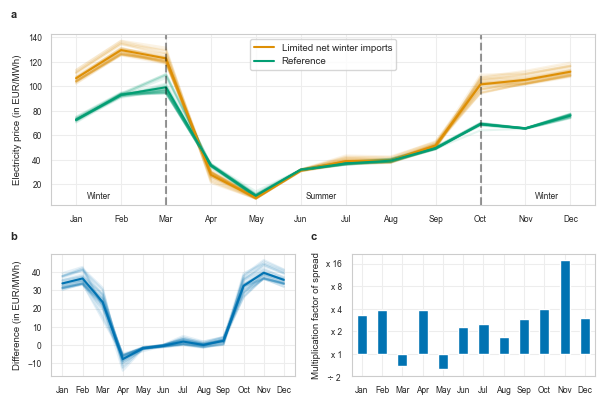

In [43]:
fig = plt.figure(figsize=(15 * cm, 10 * cm), layout="constrained")
spec = fig.add_gridspec(2, 2, height_ratios=[1.4, 1])

################################################################################################################

ax0 = fig.add_subplot(spec[0, :])
max_y = np.max([df_elec_price_monthly_import_limit.max(), df_elec_price_monthly_no_import_limit.max()])
min_y = np.min([df_elec_price_monthly_import_limit.min(), df_elec_price_monthly_no_import_limit.min()])

df_elec_price_monthly_import_limit.plot(ax=ax0, alpha=0.1, color=orange, legend=False)
df_elec_price_monthly_no_import_limit.plot(ax=ax0, alpha=0.1, color=green, legend=False)

df_elec_price_monthly_import_limit.mean(axis=1).rename("mean_limited_imports").plot(ax=ax0, color=orange, label="Limited net winter imports", legend=True)
df_elec_price_monthly_no_import_limit.mean(axis=1).rename("mean_non_limited_imports").plot(ax=ax0, color=green, label="Reference", legend=True)

ax0.axvline(2, color="black", alpha=0.4, linestyle="--")
ax0.axvline(9, color="black", alpha=0.4, linestyle="--")

ax0.text(x=0.25, y=8, s="Winter", fontsize=fontsize_ticks)
ax0.text(x=10.2, y=8, s="Winter", fontsize=fontsize_ticks)
ax0.text(x=5.1, y=8, s="Summer", fontsize=fontsize_ticks)

ax0.set_ylim([min_y - 5, max_y + 5])
ax0.set_ylabel("Electricity price (in EUR/MWh)", fontsize=fontsize_labels)

ax0.set_xticks(range(len(df_elec_price_monthly_import_limit)))
ax0.set_xticklabels(df_elec_price_monthly_import_limit.index)

ax0.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax0.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax0.set_title("a", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.075, y=1.05)

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=handles[-2:], labels=labels[-2:], loc='upper center', fontsize=fontsize_labels)

################################################################################################################

ax10 = fig.add_subplot(spec[1, 0])

(df_elec_price_monthly_import_limit - df_elec_price_monthly_no_import_limit).plot(ax=ax10, alpha=0.1, color=blue, legend=False)

(df_elec_price_monthly_import_limit.mean(axis=1).rename("mean_limited_imports") - 
    df_elec_price_monthly_no_import_limit.mean(axis=1).rename("mean_non_limited_imports")).plot(ax=ax10, color=blue, legend=False)

ax10.set_ylabel("Difference (in EUR/MWh)", fontsize=fontsize_labels)

ax10.set_xticks(range(len(df_elec_price_monthly_import_limit)))
ax10.set_xticklabels(df_elec_price_monthly_import_limit.index)

ax10.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax10.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax10.set_title("b", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.17, y=1.05)

################################################################################################################

ax11 = fig.add_subplot(spec[1, 1])

sigma_ratios = np.log2(df_elec_price_monthly_import_limit.std(axis=1).rename("mean_limited_imports") / 
                df_elec_price_monthly_no_import_limit.std(axis=1).rename("mean_non_limited_imports"))

sigma_ratios.plot.bar(ax=ax11, color=blue, legend=False)

ax11.set_xticklabels(ax11.get_xticklabels(which="both"), rotation=0)

ax11.set_ylabel(r'Multiplication factor of spread', fontsize=fontsize_labels)
yticks = np.arange(int(sigma_ratios.min()) - 1, int(sigma_ratios.max()) + 1, 1, dtype=float)
ytick_labels = ["x " + str(int(2**n)) if n >= 0 else r"$\div$ " + str(int(2**(-n))) for n in yticks]
ax11.set_yticks(yticks, labels=ytick_labels)

ax11.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax11.tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax11.set_title("c", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.17, y=1.05)

plt.savefig(path_figs / "paper" / "fig_5.pdf", dpi=300, bbox_inches="tight")
plt.show()

### Fig 6 - Wind capacity + net winter imports

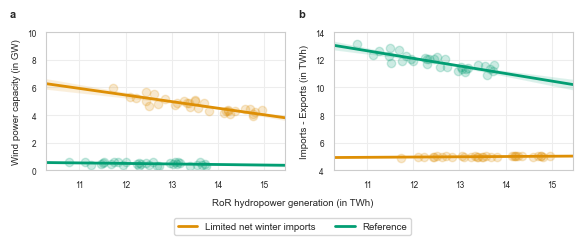

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15 * cm, 6 * cm))

wind_capacity_import_limit = df_cap_import_limit.loc["WindOn"] * 1e-3
wind_capacity_no_import_limit = df_cap_no_import_limit.loc["WindOn"] * 1e-3

ax[0].set_xlim(np.min(df_annual_ror_gen_combined) - 0.5, np.max(df_annual_ror_gen_combined) + 0.5)
sns.regplot(x=df_annual_ror_gen_limit_import_twh, 
            y=wind_capacity_import_limit.to_numpy(), 
            color=orange, 
            scatter_kws={"color": orange, "alpha": 0.2}, 
            line_kws={"color": orange, "label": "Limited net winter imports", "alpha": 1, "lw": 2}, 
            truncate=False, 
            ax=ax[0],
            n_boot=2000,
            seed=20)

sns.regplot(x=df_annual_ror_gen_no_limit_import_twh, 
            y=wind_capacity_no_import_limit.to_numpy(), 
            color=green, 
            scatter_kws={"color": green, "alpha": 0.2}, 
            line_kws={"color": green, "label": "Reference", "alpha": 1, "lw": 2}, 
            truncate=False, 
            ax=ax[0],
            n_boot=2000,
            seed=20)

ax[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax[0].tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax[0].set_ylabel("Wind power capacity (in GW)", fontsize=fontsize_labels)
ax[0].set_ylim(0, 8)
ax[0].set_yticks(np.arange(0, 11, 2))

ax[0].set_title("a", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.15, y=1.05)

################################################################################################################

total_capacity_import_limit = df_cap_import_limit.sum(axis=0) * 1e-3
total_capacity_no_import_limit = df_cap_no_import_limit.sum(axis=0) * 1e-3

ax[1].set_xlim(np.min(df_annual_ror_gen_combined) - 0.5, np.max(df_annual_ror_gen_combined) + 0.5)

sns.regplot(x=df_annual_ror_gen_limit_import_twh, 
            y=(df_winter_imports_limit_import * 1e-6 + df_winter_exports_limit_import * 1e-6).to_numpy(), 
            color=green, 
            scatter_kws={"color": orange, "alpha": 0.2}, 
            line_kws={"color": orange, "label": "Limited net winter imports", "alpha": 1, "lw": 2}, 
            truncate=False, 
            ax=ax[1],
            n_boot=2000,
            seed=20)

sns.regplot(x=df_annual_ror_gen_no_limit_import_twh, 
            y=(df_winter_imports_no_limit_import * 1e-6 + df_winter_exports_no_limit_import * 1e-6), 
            color=green, 
            scatter_kws={"color": green, "alpha": 0.2}, 
            line_kws={"color": green, "label": "Reference", "alpha": 1, "lw": 2}, 
            truncate=False, 
            ax=ax[1],
            n_boot=2000,
            seed=20)

ax[1].set_ylabel("Imports - Exports (in TWh)", fontsize=fontsize_labels)
ax[1].set_yticks(np.arange(4, 15, 2))

ax[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax[1].tick_params(axis='both', which='minor', labelsize=fontsize_ticks)

ax[1].set_title("b", fontweight='bold', loc="left", fontsize=fontsize_title, x=-0.15, y=1.05)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05), fontsize=fontsize_labels)

fig.supxlabel("RoR hydropower generation (in TWh)", fontsize=fontsize_labels, y=0.09)
plt.tight_layout()

plt.savefig(path_figs / "paper" / "fig_6.pdf", dpi=300, bbox_inches="tight")
plt.show()